In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ati-grade/Approaches to Teaching with grade.csv


# Background
**What problem do you solve?**

This project is aimed to predict the performance of Teaching Assistant in teaching demonstration with their teaching and learning approach. According to Trigwell (2004), the Approaches to Teaching Inventory (ATI) was suggested to identify the teaching and learning style of a person. The ATI consist of 16 items (5 Likert scale) characterised by two approach: Conceptual Change/Student-focused Approach (CCSF) and Information Transmission/Teacher-focused Approach (ITTF). In an institution, the teaching assistants were invited to conduct the ATI before taking a professional development course. We are insterested in their teaching approaches before the course and any influence for their teaching demostration at the end of the course. 

This project is the second step: 1. to predict the TA's performance with their teaching approach using supervised Machine Learning. We may also consider the teaching experience of the TA. Hence, this project is also would like to look into which features influence the teaching demonstration most.





**What ML approach do you use, or what methods does your app use?**

Multi-linear Regression method is going to be used.

# Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data 
**Data Inspection**

In the raw data, we found 516 responses and 20 columns in total. There are null data in some features. Meanwhile, the response ID is not related to this project objectives.

In [108]:
#import data file
data = pd.read_csv('/kaggle/input/ati-grade/Approaches to Teaching with grade.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Response ID                516 non-null    object 
 1   PriorTeachingExperience    516 non-null    int64  
 2   YearsofTeachingExperience  117 non-null    float64
 3   Item1                      512 non-null    float64
 4   Item2                      512 non-null    float64
 5   Item3                      512 non-null    float64
 6   Item4                      512 non-null    float64
 7   Item5                      512 non-null    float64
 8   Item6                      512 non-null    float64
 9   Item7                      512 non-null    float64
 10  Item8                      512 non-null    float64
 11  Item9                      511 non-null    float64
 12  Item10                     511 non-null    float64
 13  Item11                     511 non-null    float64

**Clean Data**

Hence, The *'Response ID'* will be removed. 

Apart from *'year of teaching experience'*, the null data will be filled by mean. The null data in *'year of teaching experience'* will be filled as 0.

Meanwhile, we are going to sum-up the items for ITTF and CCSF score which reflect respondents' degree of teaching approaches. 

The action code and result are as below:

In [109]:
#drop unnecessary features 
clean_data = data.drop(columns=['Response ID'], axis=1)
#fill mean to null cell
clean_data['YearsofTeachingExperience'].fillna(0, inplace=True)
clean_data.fillna(clean_data.mean(), inplace=True)

#calculate CCSF
Intention_for_CCSF = clean_data['Item5']+clean_data['Item8']+clean_data['Item15']+clean_data['Item16']
Strategy_for_CCSF = clean_data['Item3']+clean_data['Item6']+clean_data['Item9']+clean_data['Item14']
clean_data['CCSF'] = Intention_for_CCSF+Strategy_for_CCSF

#calculate ITTF
Intention_for_ITTF = clean_data['Item2']+clean_data['Item4']+clean_data['Item11']+clean_data['Item13']
Strategy_for_ITTF = clean_data['Item1']+clean_data['Item7']+clean_data['Item10']+clean_data['Item12']
clean_data['ITTF'] = Intention_for_ITTF+Strategy_for_ITTF

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PriorTeachingExperience    516 non-null    int64  
 1   YearsofTeachingExperience  516 non-null    float64
 2   Item1                      516 non-null    float64
 3   Item2                      516 non-null    float64
 4   Item3                      516 non-null    float64
 5   Item4                      516 non-null    float64
 6   Item5                      516 non-null    float64
 7   Item6                      516 non-null    float64
 8   Item7                      516 non-null    float64
 9   Item8                      516 non-null    float64
 10  Item9                      516 non-null    float64
 11  Item10                     516 non-null    float64
 12  Item11                     516 non-null    float64
 13  Item12                     516 non-null    float64

**Visualize**

Afterwards, we are going to look into the statistics description of the features and target column: *'grade'*. 

The grade is left-skewed. Majority of TA got the full marks 12 in teaching demonstration.  

Majority of TA did not have any teaching experience

It showed that the CCSF and ITTF are about normal distribution. The mean and mode score for ITTF slightly higher than the CCSF which indicates the respondents more tend to ITTF than CCSF. 

Text(0, 0.5, 'Count')

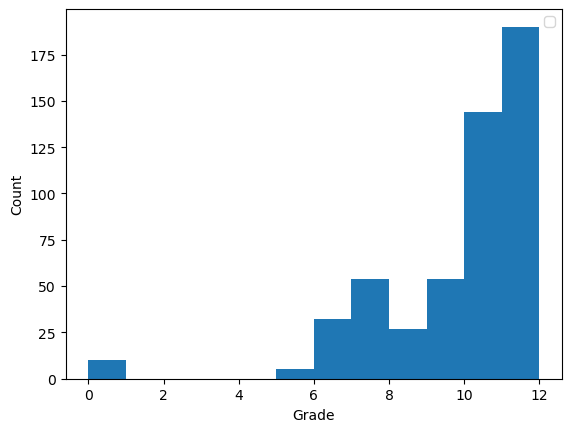

In [110]:
#show histrogram for Grade of the Teaching Demonstration
bins = np.arange(0, 13)
plt.hist([clean_data['grade']], bins)
plt.legend(loc='upper right')
plt.xlabel('Grade')
plt.ylabel('Count')

([<matplotlib.axis.XTick at 0x7f312410c340>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

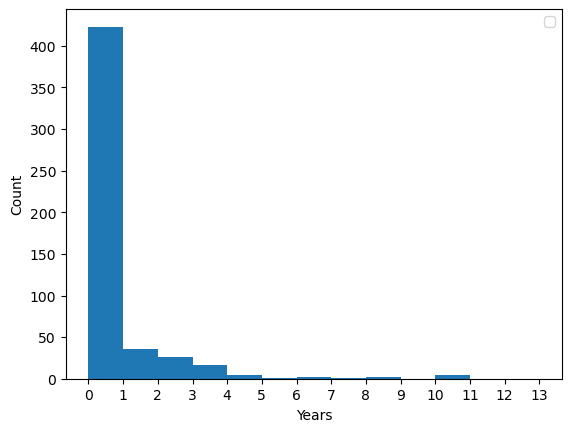

In [111]:
#show histrogram for Teaching Experience
bins = np.arange(0, 14)
plt.hist([clean_data['YearsofTeachingExperience']], bins)
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(np.arange(0, 14))

Text(0, 0.5, 'Count')

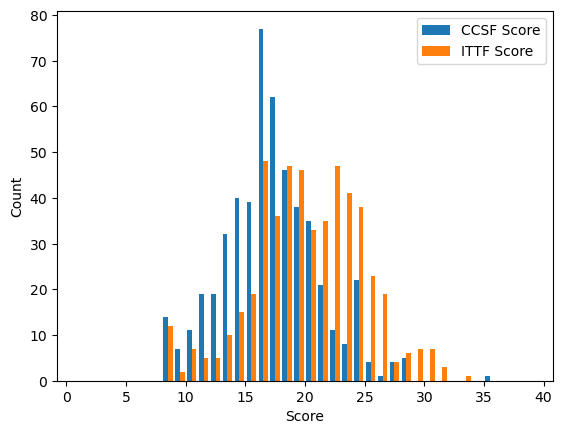

In [112]:
import matplotlib.pyplot as plt
#show histrogram for CCSF and ITTF score
bins = np.arange(1, 40)
plt.hist([clean_data['CCSF'], clean_data['ITTF']], bins, label=['CCSF Score', 'ITTF Score'])
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Count')

**For each features (Item 1 to 16)**, most of the items returns low mean score and no items has mean higher than 3.6. Although they are low scoring, they showed different distribution.

**Overall**, in the pair plot, we did not find significant correlation or collinear between the features or with grade. It indicates that the data may be able to result a meaningful insight.

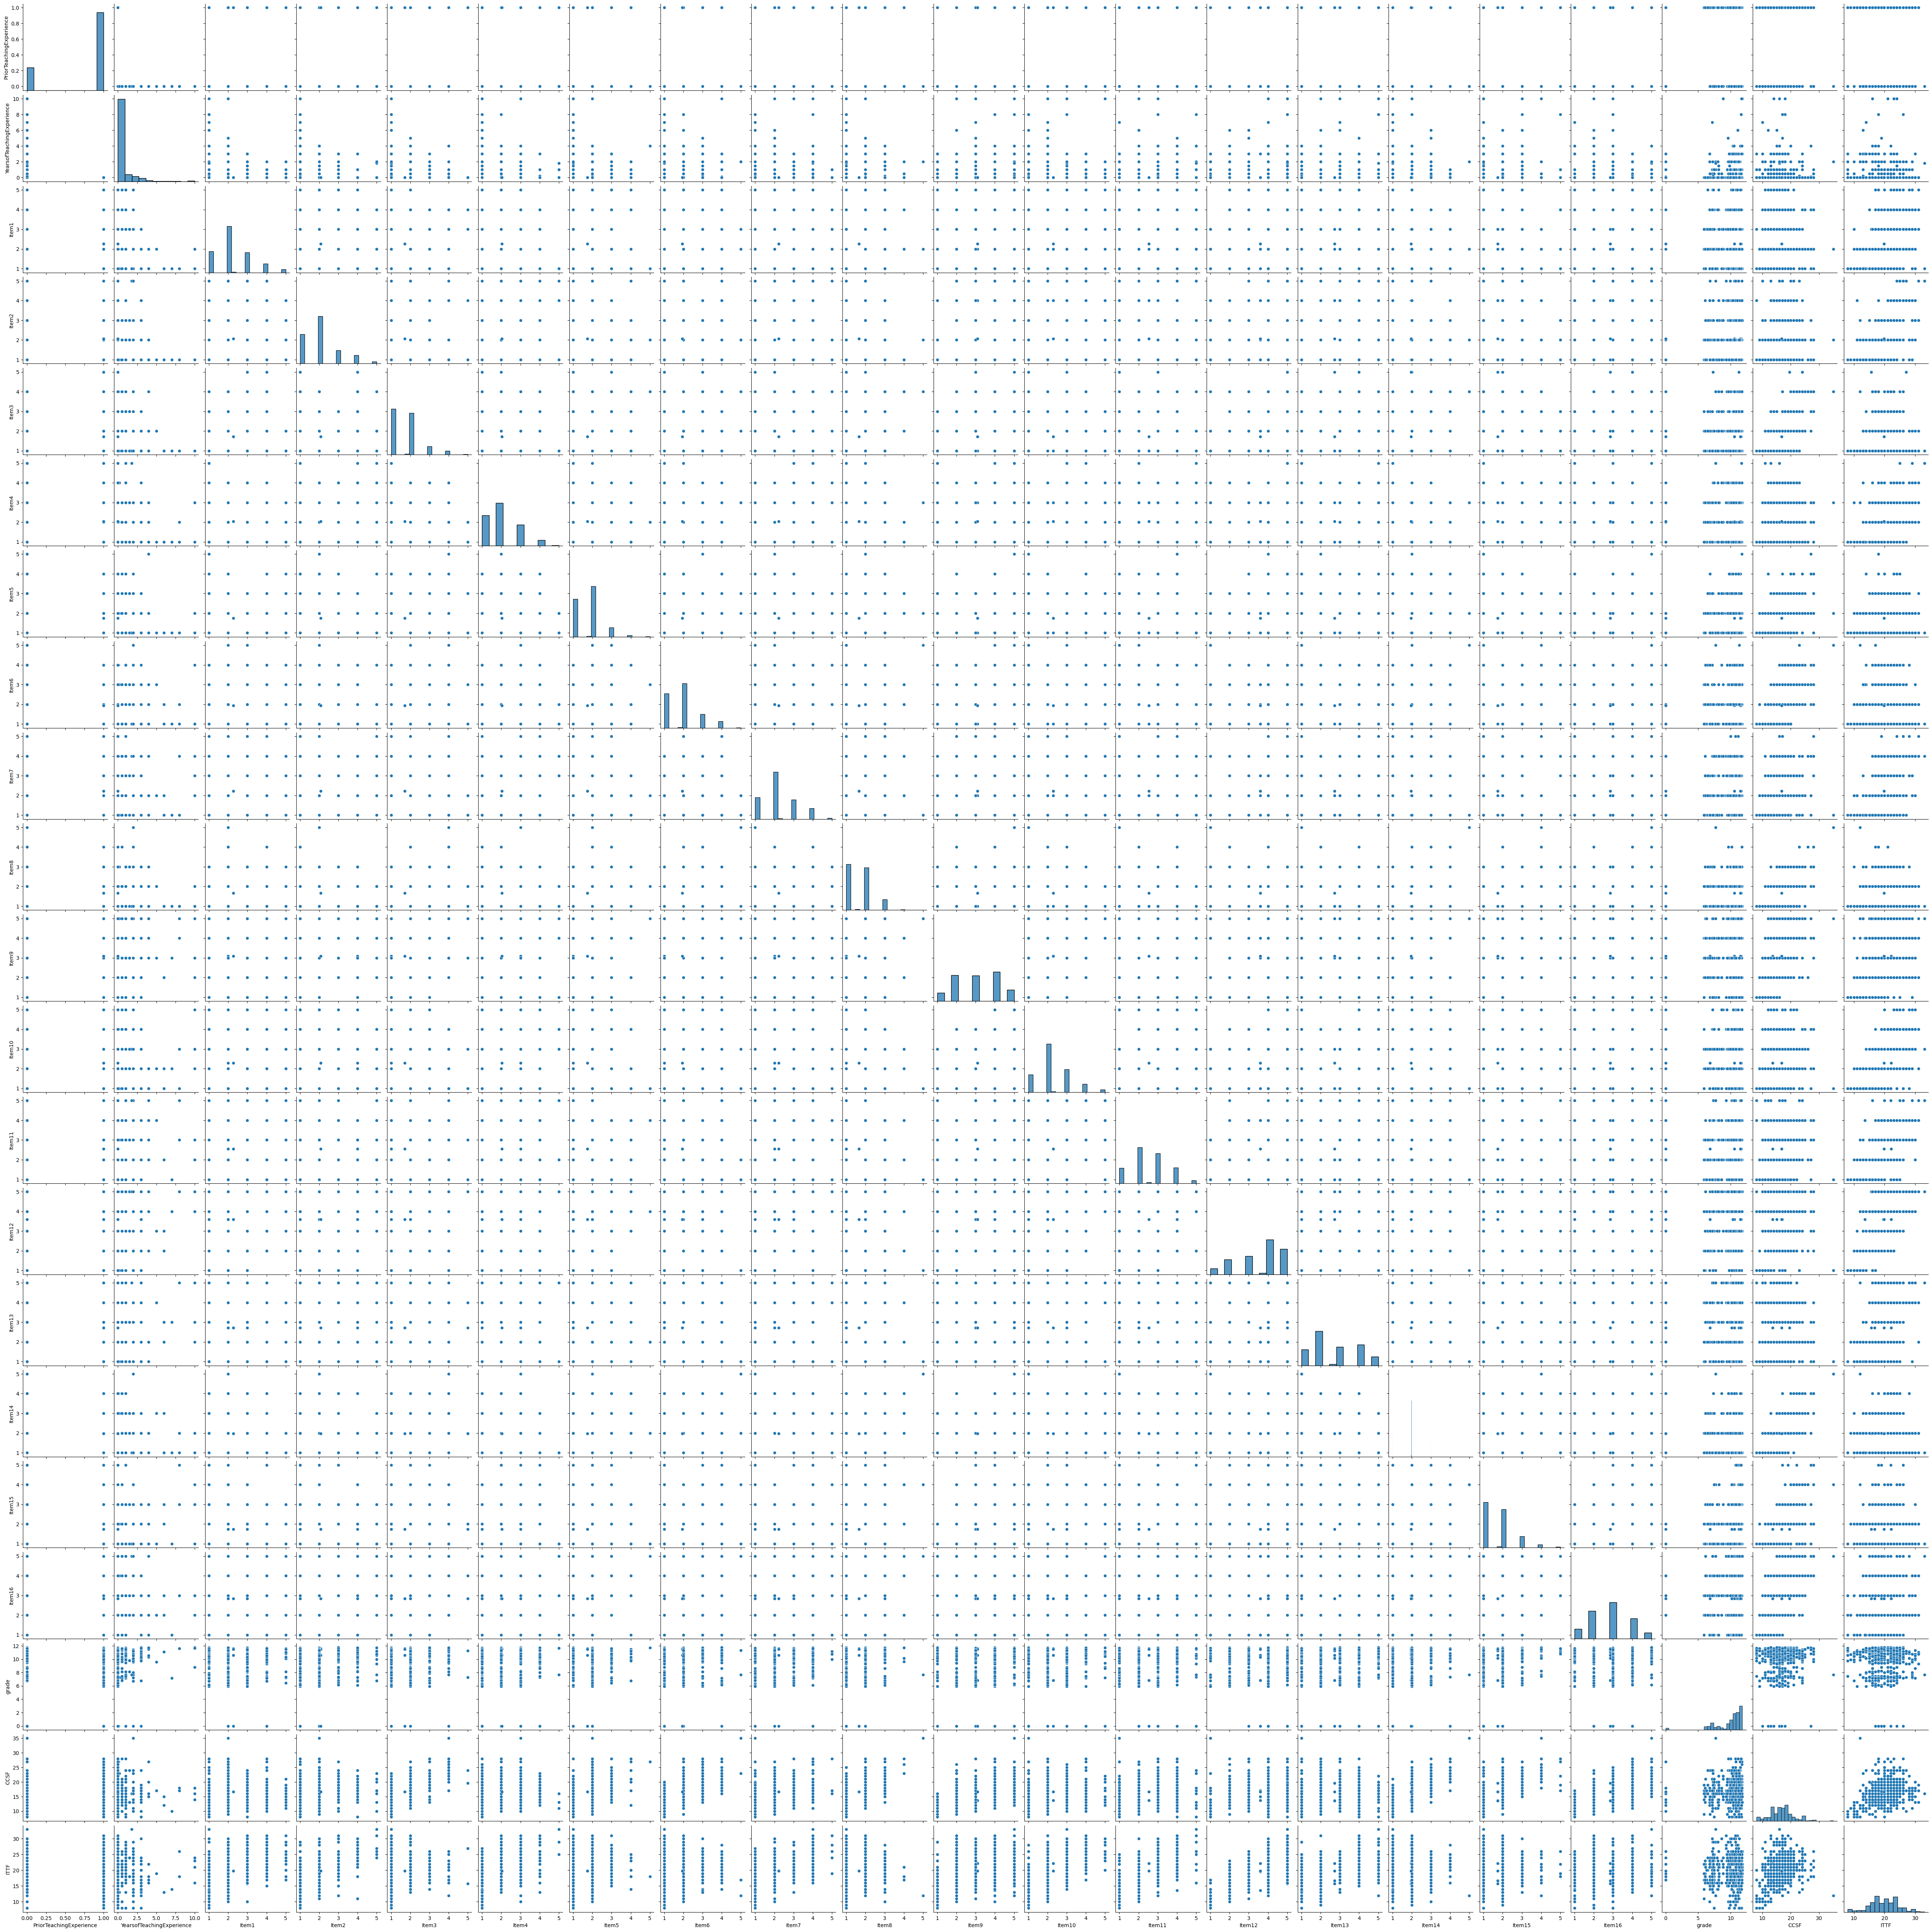

In [113]:
import seaborn as sns
#show pairplot for the ATI and grade
sns.pairplot(clean_data)

# Analysis 
We start build the multi-linear regression model. 

First, build a full mulit-linear regression model and find out the significant features. Unfortunately, all features returned insignificant with the model. 

In the leverage against the square of the residual plot, some unusal rows were found.


grade ~ PriorTeachingExperience+YearsofTeachingExperience+Item1+Item2+Item3+Item4+Item5+Item6+Item7+Item8+Item9+Item10+Item11+Item12+Item13+Item14+Item15+Item16+CCSF+ITTF
                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9124
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.564
Time:                        11:04:45   Log-Likelihood:                -1118.4
No. Observations:                 516   AIC:                             2275.
Df Residuals:                     497   BIC:                             2356.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef   

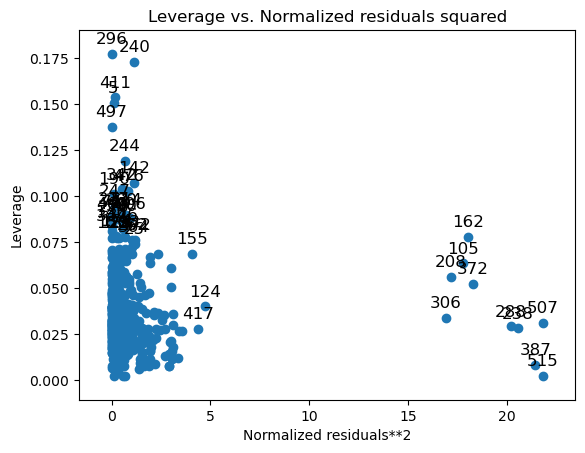

In [114]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

X = clean_data.copy()
X.drop('grade', axis=1, inplace = True)

#set up the formular with all column
formula = 'grade ~ '
num_column = 0
for c in X.columns:
    formula += c
    num_column+=1
    if num_column<len(X.columns):
        formula += '+'
print(formula)        
    

#build the full mutli-linear regression model
full_model = smf.ols(formula=formula, data=clean_data).fit()
print(full_model.summary())

# plot the leverage vs. the square of the residual
sm.graphics.plot_leverage_resid2(full_model)
plt.show()

Second, order the p value of each features and add the features one by one and find the best model.


However, the r square still remained a vry low level. As expect, it is hard to find a meaningful insight from the ATI to predict the teaching demonstration performance.

In [115]:

# list of indices for high-leverage and/or high-residual points
unusual = [296, 240,411,5,497,162,105,208,372,306,238,288,507,387,515]
clean_data = clean_data.drop(unusual, axis=0)
features = []
feature = ['',0]
#build the single-linear regression model for each features
for c in X.columns:
    model = smf.ols(formula='grade ~ '+c, data=clean_data).fit()
    #print(model.pvalues)
    feature=[c,model.pvalues[1]]
    #print(feature)
    features.append(feature)

#order the features by p values
features.sort(key=lambda x: x[1])
print(features)  

#add the features one by one and find the best model
best=['',0]
formula = 'grade ~ '
formula+=features[0][0]
model = smf.ols(formula=formula, data=clean_data).fit()
if model.rsquared>=best[1]:
    best=[formula,model.rsquared]

for f in range(1,len(features)):
    formula+='+'+features[f][0]
    model = smf.ols(formula=formula, data=clean_data).fit()
    if model.rsquared>=best[1]:
        best=[formula,model.rsquared]
print(best)

[['Item13', 0.13307466681539118], ['Item15', 0.20124121960114605], ['YearsofTeachingExperience', 0.3217028005256283], ['Item2', 0.34514267225292605], ['Item1', 0.532048558645567], ['Item12', 0.570186779744802], ['Item6', 0.619958091126934], ['Item3', 0.6502505192492609], ['Item4', 0.6601877667883816], ['Item11', 0.6909407905113247], ['Item7', 0.7232704362209476], ['Item16', 0.7337766633388333], ['CCSF', 0.7541306487332199], ['ITTF', 0.7940167728961642], ['Item9', 0.8206673283525663], ['Item14', 0.8291266426576512], ['Item8', 0.8379490044774365], ['PriorTeachingExperience', 0.8582983907728072], ['Item10', 0.9421915088013357], ['Item5', 0.96113759569509]]
['grade ~ Item13+Item15+YearsofTeachingExperience+Item2+Item1+Item12+Item6+Item3+Item4+Item11+Item7+Item16+CCSF+ITTF+Item9+Item14+Item8+PriorTeachingExperience+Item10+Item5', 0.018631765434573677]


# Evaluation
Despite this, we try to analysis the performance when split the data into training and test dataset. The model set to grade ~ CCSF+ITTF+CCSF:ITTF

Even through the performance is disater in the model, the execution is fast with 0.009599447250366211 and the performance is stable. The MSE of Test data most likely higher than the training data, indicating overfitting. 

without spliting: 0.006782714680398594
excution_time:  0.009599447250366211
[2.601018079409055, 2.7458211020705807, 2.6612905494747623, 2.7041163245774986, 2.814495050531052, 2.6351661537008786, 2.6586668766000408, 2.6723560839291256, 2.72391859898096, 2.7795397191798474, 2.759314271505838, 2.6587614217744124, 2.6295229176875523, 2.7516126956814375, 2.7274048653855183, 2.7717124117340264, 2.7314306802673682, 2.6682704467045237, 2.576489202653146, 2.6821537035236513]
[3.354564000890517, 2.7768177610027935, 3.0933762586328974, 2.9222294131317987, 2.4709755214157965, 3.23530072636495, 3.104669376770594, 3.0654217721986243, 2.8410199540252576, 2.6411077182060803, 2.6988733435601056, 3.100397327676572, 3.224133859621862, 2.741670513348933, 2.825729920882957, 2.6486702534075226, 2.8366638451457056, 3.081100325196808, 3.454825592659341, 3.009397454524824]


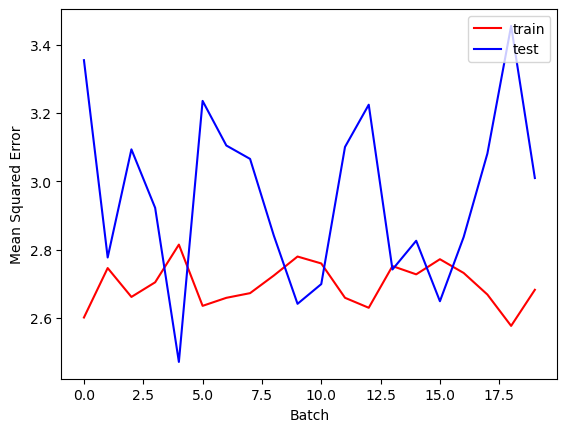

In [145]:
from sklearn.metrics import mean_squared_error

#calculate the execution time for each batches
import time
start = time.time()
#build final model
formula = 'grade ~ CCSF+ITTF++CCSF:ITTF'
final_model = smf.ols(formula=formula, data=clean_data).fit()
stop = time.time()
print('without spliting:',final_model.rsquared)
excution_time = (stop-start)
print('excution_time: ',excution_time)

#split training and test dataset by 20 batch
train_mse=[]
test_mse=[]
for k in range(20):
    train = clean_data.sample(frac=0.8)
    test = clean_data.drop(train.index)
    final_model = smf.ols(formula=formula, data=train).fit()
    train_predictions = final_model.predict(train)
    test_predictions = final_model.predict(test)
    train_mse.append(mean_squared_error(train['grade'], train_predictions))
    test_mse.append(mean_squared_error(test['grade'], test_predictions))

print(train_mse)
print(test_mse)
plt.plot(range(20), train_mse, 'r',label='train')
plt.plot(range(20), test_mse, 'b',label='test')

plt.xlabel("Batch")
plt.ylabel("Mean Squared Error")
plt.legend(loc='upper right')

# Discussion
As a result, the regression model is disappointed with worse fitting and performance. Most likely the dataset does not have any insight in-between the ATI and teaching demonstration performance.

In the future, we could try other supervised learning such as decision tree and SVM.